In [33]:
import pandas as pd
import matplotlib.pyplot as plt


In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
dfTrain = pd.read_csv("train.csv")
dfTrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Limpeza dos dados

In [36]:
def convertSex(x):
    if x == 'male':
        return 1
    return 0

def cabinCat(x):
    if x == 'N':
        return 0
    return 1

dfTrain['Sex'] = dfTrain['Sex'].apply(lambda x:convertSex(x))

dfTrain['Age'] = dfTrain.Age.fillna(0)

dfTrain['Cabin'] = dfTrain.Cabin.fillna('N')
dfTrain['Cabin'] = dfTrain.Cabin.apply(lambda x:cabinCat(x))


In [37]:
dfTrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,1,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,1,C


## Analisando o Dataset

### Survived

In [38]:
survived = dfTrain.groupby(['Survived']).count()['PassengerId']
survived

Survived
0    549
1    342
Name: PassengerId, dtype: int64

<AxesSubplot:xlabel='Survived'>

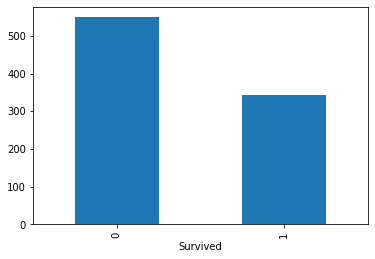

In [39]:
survived.plot(kind='bar')

In [40]:
survived[1]/(survived[1]+survived[0])

0.3838383838383838

Ou seja, 38% dos tripulantes sobreviveram

### Pclass

In [41]:
pclass = dfTrain.groupby(['Pclass','Survived']).count()['PassengerId']
pclass

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64

<AxesSubplot:xlabel='Pclass,Survived'>

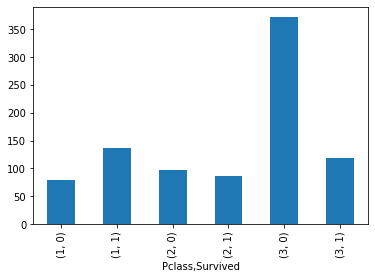

In [42]:
pclass.plot(kind='bar')

Podemos perceber pela tabela que, passageiros da classe 3 tem menos chance de sobreviver.

### Sex

In [43]:
sex = dfTrain.groupby(['Sex','Survived']).count()['PassengerId']
sex

Sex  Survived
0    0            81
     1           233
1    0           468
     1           109
Name: PassengerId, dtype: int64

<AxesSubplot:xlabel='Sex,Survived'>

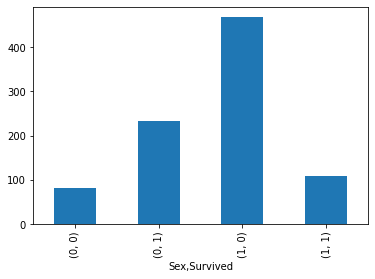

In [44]:
sex.plot(kind='bar')

### Embarked

In [45]:
embarked = dfTrain.groupby(['Embarked','Survived']).count()['PassengerId']
embarked

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: PassengerId, dtype: int64

<AxesSubplot:xlabel='Embarked,Survived'>

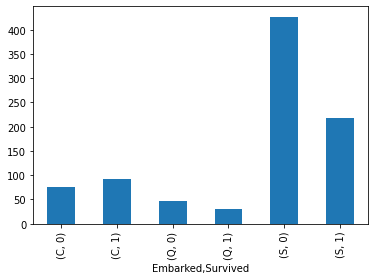

In [46]:
embarked.plot(kind='bar')

### Age

<AxesSubplot:title={'center':'Grafico dos sobreviventes'}, ylabel='Frequency'>

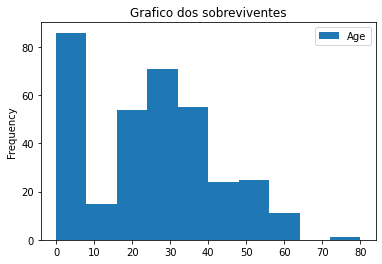

In [47]:
age = dfTrain[['Survived','Age']].set_index("Survived")
age[age.index == 1].plot(kind = 'hist',title='Grafico dos sobreviventes')

<AxesSubplot:title={'center':'Grafico dos Falecidos'}, ylabel='Frequency'>

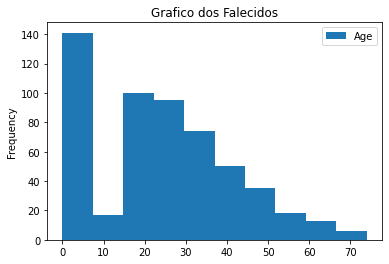

In [48]:
age[age.index == 0].plot(kind = 'hist',title='Grafico dos Falecidos')

### Sibsp

In [49]:
SibSp = dfTrain.groupby(['SibSp','Survived']).count()['PassengerId']
SibSp

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: PassengerId, dtype: int64

### Parch

In [50]:
parch = dfTrain.groupby(['Parch','Survived']).count()['PassengerId']
parch

Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: PassengerId, dtype: int64

### Fare

<AxesSubplot:title={'center':'Grafico dos sobreviventes'}, ylabel='Frequency'>

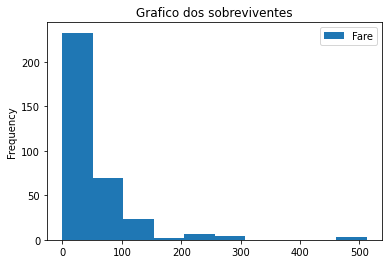

In [51]:
fare = dfTrain[['Survived','Fare']].set_index("Survived")
fare[fare.index == 1].plot(kind = 'hist',title='Grafico dos sobreviventes')

<AxesSubplot:title={'center':'Grafico dos falecidos'}, ylabel='Frequency'>

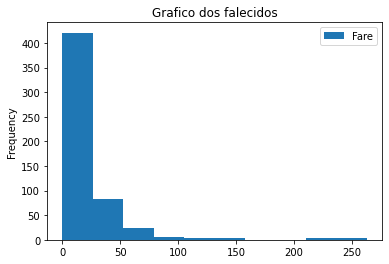

In [52]:
fare = dfTrain[['Survived','Fare']].set_index("Survived")
fare[fare.index == 0].plot(kind = 'hist',title='Grafico dos falecidos')

### Cabin

In [53]:
cabin = dfTrain.groupby(['Cabin','Survived']).count()['PassengerId']
cabin

Cabin  Survived
0      0           481
       1           206
1      0            68
       1           136
Name: PassengerId, dtype: int64

## Aplicando engenharia de atributos

In [54]:
engAtb = dfTrain.drop(["Ticket",'PassengerId',"Name"],axis=1)
engAtb =  pd.get_dummies(engAtb,columns=['Pclass','Embarked'])
engAtb

,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,1,22.0,1,0,7.2500,0,0,0,1,0,0,1
1,1,0,38.0,1,0,71.2833,1,1,0,0,1,0,0
2,1,0,26.0,0,0,7.9250,0,0,0,1,0,0,1
3,1,0,35.0,1,0,53.1000,1,1,0,0,0,0,1
4,0,1,35.0,0,0,8.0500,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,27.0,0,0,13.0000,0,0,1,0,0,0,1
887,1,0,19.0,0,0,30.0000,1,1,0,0,0,0,1
888,0,0,0.0,1,2,23.4500,0,0,0,1,0,0,1
889,1,1,26.0,0,0,30.0000,1,1,0,0,1,0,0


## Escolhendo os melhores modelos

In [55]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier




In [56]:
trainSplit,testSplit = train_test_split(engAtb, test_size=0.2)
x_train_split,y_train_split = trainSplit.drop(columns =['Survived']),trainSplit['Survived']
x_test_split,y_test_split = testSplit.drop(columns =['Survived']),testSplit['Survived']
x_train_split

,Sex,Age,SibSp,Parch,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
661,1,40.0,0,0,7.2250,0,0,0,1,1,0,0
817,1,31.0,1,1,37.0042,0,0,1,0,1,0,0
633,1,0.0,0,0,0.0000,0,1,0,0,0,0,1
448,0,5.0,2,1,19.2583,0,0,0,1,1,0,0
722,1,34.0,0,0,13.0000,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
352,1,15.0,1,1,7.2292,0,0,0,1,1,0,0
394,0,24.0,0,2,16.7000,1,0,0,1,0,0,1
876,1,20.0,0,0,9.8458,0,0,0,1,0,0,1
830,0,15.0,1,0,14.4542,0,0,0,1,1,0,0


In [57]:
model = [RandomForestClassifier(),LogisticRegression(),SGDClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),XGBClassifier(),CatBoostRegressor(),MLPClassifier()]
scores = {}
for i in model:
    scores[type(i).__name__] = cross_val_score(i,x_train_split,y_train_split,cv=10)
scores = pd.DataFrame.from_dict(scores)
scores

[14:17:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

297:	learn: 0.2913132	total: 347ms	remaining: 818ms
298:	learn: 0.2911569	total: 348ms	remaining: 817ms
299:	learn: 0.2911162	total: 349ms	remaining: 815ms
300:	learn: 0.2910389	total: 351ms	remaining: 814ms
301:	learn: 0.2910292	total: 352ms	remaining: 813ms
302:	learn: 0.2909465	total: 353ms	remaining: 811ms
303:	learn: 0.2906505	total: 354ms	remaining: 810ms
304:	learn: 0.2904863	total: 355ms	remaining: 808ms
305:	learn: 0.2902222	total: 355ms	remaining: 806ms
306:	learn: 0.2899754	total: 356ms	remaining: 804ms
307:	learn: 0.2897273	total: 357ms	remaining: 803ms
308:	learn: 0.2895829	total: 358ms	remaining: 801ms
309:	learn: 0.2891866	total: 359ms	remaining: 799ms
310:	learn: 0.2891342	total: 360ms	remaining: 797ms
311:	learn: 0.2890530	total: 361ms	remaining: 796ms
312:	learn: 0.2886661	total: 362ms	remaining: 795ms
313:	learn: 0.2886376	total: 363ms	remaining: 793ms
314:	learn: 0.2883900	total: 364ms	remaining: 791ms
315:	learn: 0.2883295	total: 365ms	remaining: 790ms
316:	learn: 

484:	learn: 0.2585407	total: 521ms	remaining: 553ms
485:	learn: 0.2582512	total: 522ms	remaining: 552ms
486:	learn: 0.2581399	total: 523ms	remaining: 551ms
487:	learn: 0.2580985	total: 524ms	remaining: 549ms
488:	learn: 0.2580558	total: 525ms	remaining: 548ms
489:	learn: 0.2579663	total: 525ms	remaining: 547ms
490:	learn: 0.2578773	total: 526ms	remaining: 545ms
491:	learn: 0.2575572	total: 527ms	remaining: 544ms
492:	learn: 0.2574277	total: 528ms	remaining: 543ms
493:	learn: 0.2572933	total: 529ms	remaining: 541ms
494:	learn: 0.2571904	total: 529ms	remaining: 540ms
495:	learn: 0.2570385	total: 530ms	remaining: 539ms
496:	learn: 0.2569608	total: 531ms	remaining: 537ms
497:	learn: 0.2568159	total: 532ms	remaining: 536ms
498:	learn: 0.2564969	total: 533ms	remaining: 535ms
499:	learn: 0.2564505	total: 534ms	remaining: 534ms
500:	learn: 0.2563082	total: 535ms	remaining: 533ms
501:	learn: 0.2562023	total: 536ms	remaining: 531ms
502:	learn: 0.2560509	total: 537ms	remaining: 530ms
503:	learn: 

704:	learn: 0.2306433	total: 697ms	remaining: 292ms
705:	learn: 0.2305465	total: 698ms	remaining: 291ms
706:	learn: 0.2304560	total: 699ms	remaining: 290ms
707:	learn: 0.2302994	total: 700ms	remaining: 289ms
708:	learn: 0.2301910	total: 701ms	remaining: 288ms
709:	learn: 0.2299722	total: 701ms	remaining: 286ms
710:	learn: 0.2298806	total: 702ms	remaining: 285ms
711:	learn: 0.2298398	total: 703ms	remaining: 285ms
712:	learn: 0.2296624	total: 704ms	remaining: 283ms
713:	learn: 0.2294383	total: 705ms	remaining: 282ms
714:	learn: 0.2293198	total: 706ms	remaining: 281ms
715:	learn: 0.2292404	total: 707ms	remaining: 280ms
716:	learn: 0.2291443	total: 708ms	remaining: 279ms
717:	learn: 0.2290308	total: 709ms	remaining: 278ms
718:	learn: 0.2288934	total: 710ms	remaining: 277ms
719:	learn: 0.2286259	total: 711ms	remaining: 276ms
720:	learn: 0.2283699	total: 712ms	remaining: 275ms
721:	learn: 0.2283243	total: 713ms	remaining: 274ms
722:	learn: 0.2282573	total: 714ms	remaining: 273ms
723:	learn: 

903:	learn: 0.2118566	total: 872ms	remaining: 92.6ms
904:	learn: 0.2118211	total: 873ms	remaining: 91.7ms
905:	learn: 0.2117585	total: 874ms	remaining: 90.7ms
906:	learn: 0.2116889	total: 875ms	remaining: 89.7ms
907:	learn: 0.2116488	total: 876ms	remaining: 88.7ms
908:	learn: 0.2115768	total: 877ms	remaining: 87.8ms
909:	learn: 0.2114195	total: 877ms	remaining: 86.8ms
910:	learn: 0.2113776	total: 878ms	remaining: 85.8ms
911:	learn: 0.2113378	total: 880ms	remaining: 84.9ms
912:	learn: 0.2110671	total: 880ms	remaining: 83.9ms
913:	learn: 0.2109976	total: 881ms	remaining: 82.9ms
914:	learn: 0.2109639	total: 882ms	remaining: 81.9ms
915:	learn: 0.2109055	total: 883ms	remaining: 81ms
916:	learn: 0.2107936	total: 884ms	remaining: 80ms
917:	learn: 0.2107527	total: 885ms	remaining: 79ms
918:	learn: 0.2106797	total: 885ms	remaining: 78ms
919:	learn: 0.2106548	total: 886ms	remaining: 77.1ms
920:	learn: 0.2105843	total: 887ms	remaining: 76.1ms
921:	learn: 0.2105617	total: 888ms	remaining: 75.1ms
9

232:	learn: 0.2995425	total: 186ms	remaining: 613ms
233:	learn: 0.2994451	total: 187ms	remaining: 613ms
234:	learn: 0.2991854	total: 188ms	remaining: 612ms
235:	learn: 0.2991323	total: 189ms	remaining: 612ms
236:	learn: 0.2990017	total: 190ms	remaining: 611ms
237:	learn: 0.2989435	total: 191ms	remaining: 610ms
238:	learn: 0.2988626	total: 192ms	remaining: 610ms
239:	learn: 0.2987647	total: 193ms	remaining: 610ms
240:	learn: 0.2986878	total: 193ms	remaining: 609ms
241:	learn: 0.2985870	total: 194ms	remaining: 608ms
242:	learn: 0.2985334	total: 195ms	remaining: 607ms
243:	learn: 0.2984243	total: 196ms	remaining: 606ms
244:	learn: 0.2981642	total: 197ms	remaining: 606ms
245:	learn: 0.2980056	total: 197ms	remaining: 605ms
246:	learn: 0.2979423	total: 198ms	remaining: 604ms
247:	learn: 0.2978744	total: 199ms	remaining: 604ms
248:	learn: 0.2977834	total: 200ms	remaining: 603ms
249:	learn: 0.2974482	total: 201ms	remaining: 603ms
250:	learn: 0.2973662	total: 202ms	remaining: 602ms
251:	learn: 

449:	learn: 0.2588972	total: 362ms	remaining: 442ms
450:	learn: 0.2588489	total: 363ms	remaining: 441ms
451:	learn: 0.2587368	total: 363ms	remaining: 441ms
452:	learn: 0.2585597	total: 364ms	remaining: 440ms
453:	learn: 0.2583390	total: 365ms	remaining: 439ms
454:	learn: 0.2582312	total: 366ms	remaining: 438ms
455:	learn: 0.2581774	total: 367ms	remaining: 438ms
456:	learn: 0.2578970	total: 368ms	remaining: 437ms
457:	learn: 0.2576106	total: 368ms	remaining: 436ms
458:	learn: 0.2574944	total: 369ms	remaining: 435ms
459:	learn: 0.2569896	total: 370ms	remaining: 434ms
460:	learn: 0.2565095	total: 371ms	remaining: 434ms
461:	learn: 0.2564392	total: 372ms	remaining: 433ms
462:	learn: 0.2563504	total: 373ms	remaining: 432ms
463:	learn: 0.2562925	total: 373ms	remaining: 431ms
464:	learn: 0.2562190	total: 374ms	remaining: 431ms
465:	learn: 0.2557624	total: 375ms	remaining: 430ms
466:	learn: 0.2556769	total: 376ms	remaining: 429ms
467:	learn: 0.2555247	total: 377ms	remaining: 428ms
468:	learn: 

665:	learn: 0.2325611	total: 538ms	remaining: 270ms
666:	learn: 0.2324134	total: 539ms	remaining: 269ms
667:	learn: 0.2321740	total: 540ms	remaining: 268ms
668:	learn: 0.2320152	total: 541ms	remaining: 268ms
669:	learn: 0.2319780	total: 542ms	remaining: 267ms
670:	learn: 0.2317999	total: 542ms	remaining: 266ms
671:	learn: 0.2316542	total: 543ms	remaining: 265ms
672:	learn: 0.2314619	total: 544ms	remaining: 264ms
673:	learn: 0.2313022	total: 545ms	remaining: 264ms
674:	learn: 0.2311292	total: 546ms	remaining: 263ms
675:	learn: 0.2310748	total: 547ms	remaining: 262ms
676:	learn: 0.2309255	total: 548ms	remaining: 261ms
677:	learn: 0.2308735	total: 549ms	remaining: 261ms
678:	learn: 0.2307708	total: 550ms	remaining: 260ms
679:	learn: 0.2307243	total: 551ms	remaining: 259ms
680:	learn: 0.2306759	total: 552ms	remaining: 258ms
681:	learn: 0.2303376	total: 553ms	remaining: 258ms
682:	learn: 0.2302612	total: 554ms	remaining: 257ms
683:	learn: 0.2302090	total: 555ms	remaining: 256ms
684:	learn: 

866:	learn: 0.2145987	total: 712ms	remaining: 109ms
867:	learn: 0.2145453	total: 713ms	remaining: 108ms
868:	learn: 0.2143381	total: 714ms	remaining: 108ms
869:	learn: 0.2142515	total: 715ms	remaining: 107ms
870:	learn: 0.2141591	total: 716ms	remaining: 106ms
871:	learn: 0.2141137	total: 717ms	remaining: 105ms
872:	learn: 0.2140766	total: 719ms	remaining: 105ms
873:	learn: 0.2140166	total: 720ms	remaining: 104ms
874:	learn: 0.2139558	total: 721ms	remaining: 103ms
875:	learn: 0.2138964	total: 721ms	remaining: 102ms
876:	learn: 0.2138216	total: 722ms	remaining: 101ms
877:	learn: 0.2137743	total: 723ms	remaining: 101ms
878:	learn: 0.2136931	total: 724ms	remaining: 99.7ms
879:	learn: 0.2136357	total: 725ms	remaining: 98.9ms
880:	learn: 0.2136109	total: 726ms	remaining: 98.1ms
881:	learn: 0.2134609	total: 727ms	remaining: 97.3ms
882:	learn: 0.2133867	total: 730ms	remaining: 96.7ms
883:	learn: 0.2132551	total: 731ms	remaining: 95.9ms
884:	learn: 0.2132124	total: 731ms	remaining: 95ms
885:	le

212:	learn: 0.3015558	total: 177ms	remaining: 653ms
213:	learn: 0.3012675	total: 178ms	remaining: 653ms
214:	learn: 0.3011938	total: 179ms	remaining: 653ms
215:	learn: 0.3009758	total: 180ms	remaining: 652ms
216:	learn: 0.3008724	total: 181ms	remaining: 651ms
217:	learn: 0.3008190	total: 181ms	remaining: 650ms
218:	learn: 0.3003005	total: 182ms	remaining: 649ms
219:	learn: 0.3002268	total: 183ms	remaining: 648ms
220:	learn: 0.3000246	total: 183ms	remaining: 647ms
221:	learn: 0.2998612	total: 184ms	remaining: 646ms
222:	learn: 0.2995601	total: 185ms	remaining: 645ms
223:	learn: 0.2994467	total: 186ms	remaining: 644ms
224:	learn: 0.2992695	total: 186ms	remaining: 642ms
225:	learn: 0.2991825	total: 188ms	remaining: 642ms
226:	learn: 0.2988635	total: 189ms	remaining: 642ms
227:	learn: 0.2987578	total: 189ms	remaining: 641ms
228:	learn: 0.2985135	total: 190ms	remaining: 640ms
229:	learn: 0.2980901	total: 191ms	remaining: 640ms
230:	learn: 0.2975646	total: 192ms	remaining: 639ms
231:	learn: 

425:	learn: 0.2559134	total: 351ms	remaining: 472ms
426:	learn: 0.2558627	total: 351ms	remaining: 472ms
427:	learn: 0.2556977	total: 352ms	remaining: 471ms
428:	learn: 0.2556504	total: 353ms	remaining: 470ms
429:	learn: 0.2555069	total: 354ms	remaining: 469ms
430:	learn: 0.2554550	total: 355ms	remaining: 468ms
431:	learn: 0.2551480	total: 356ms	remaining: 468ms
432:	learn: 0.2549877	total: 356ms	remaining: 467ms
433:	learn: 0.2549333	total: 357ms	remaining: 466ms
434:	learn: 0.2548811	total: 358ms	remaining: 465ms
435:	learn: 0.2547424	total: 359ms	remaining: 464ms
436:	learn: 0.2545363	total: 360ms	remaining: 464ms
437:	learn: 0.2543803	total: 361ms	remaining: 463ms
438:	learn: 0.2543354	total: 361ms	remaining: 462ms
439:	learn: 0.2539051	total: 362ms	remaining: 461ms
440:	learn: 0.2535631	total: 363ms	remaining: 460ms
441:	learn: 0.2533670	total: 364ms	remaining: 460ms
442:	learn: 0.2532293	total: 365ms	remaining: 459ms
443:	learn: 0.2529954	total: 366ms	remaining: 458ms
444:	learn: 

639:	learn: 0.2260634	total: 525ms	remaining: 295ms
640:	learn: 0.2259244	total: 526ms	remaining: 295ms
641:	learn: 0.2257884	total: 527ms	remaining: 294ms
642:	learn: 0.2257307	total: 528ms	remaining: 293ms
643:	learn: 0.2255217	total: 529ms	remaining: 292ms
644:	learn: 0.2254023	total: 530ms	remaining: 291ms
645:	learn: 0.2252150	total: 530ms	remaining: 291ms
646:	learn: 0.2250795	total: 531ms	remaining: 290ms
647:	learn: 0.2248850	total: 532ms	remaining: 289ms
648:	learn: 0.2246954	total: 533ms	remaining: 288ms
649:	learn: 0.2245794	total: 534ms	remaining: 288ms
650:	learn: 0.2244024	total: 535ms	remaining: 287ms
651:	learn: 0.2242402	total: 536ms	remaining: 286ms
652:	learn: 0.2242039	total: 537ms	remaining: 285ms
653:	learn: 0.2241142	total: 538ms	remaining: 284ms
654:	learn: 0.2240743	total: 539ms	remaining: 284ms
655:	learn: 0.2239546	total: 539ms	remaining: 283ms
656:	learn: 0.2239199	total: 540ms	remaining: 282ms
657:	learn: 0.2238847	total: 541ms	remaining: 281ms
658:	learn: 

836:	learn: 0.2064962	total: 698ms	remaining: 136ms
837:	learn: 0.2064669	total: 698ms	remaining: 135ms
838:	learn: 0.2064495	total: 699ms	remaining: 134ms
839:	learn: 0.2062954	total: 700ms	remaining: 133ms
840:	learn: 0.2062620	total: 701ms	remaining: 133ms
841:	learn: 0.2061821	total: 702ms	remaining: 132ms
842:	learn: 0.2061645	total: 703ms	remaining: 131ms
843:	learn: 0.2060685	total: 704ms	remaining: 130ms
844:	learn: 0.2060385	total: 705ms	remaining: 129ms
845:	learn: 0.2059341	total: 705ms	remaining: 128ms
846:	learn: 0.2059008	total: 706ms	remaining: 128ms
847:	learn: 0.2057672	total: 707ms	remaining: 127ms
848:	learn: 0.2055822	total: 708ms	remaining: 126ms
849:	learn: 0.2055209	total: 709ms	remaining: 125ms
850:	learn: 0.2054471	total: 710ms	remaining: 124ms
851:	learn: 0.2053549	total: 711ms	remaining: 123ms
852:	learn: 0.2051967	total: 712ms	remaining: 123ms
853:	learn: 0.2050965	total: 712ms	remaining: 122ms
854:	learn: 0.2050283	total: 713ms	remaining: 121ms
855:	learn: 

Learning rate set to 0.038165
0:	learn: 0.4766827	total: 1ms	remaining: 1s
1:	learn: 0.4696720	total: 1.95ms	remaining: 971ms
2:	learn: 0.4639912	total: 2.92ms	remaining: 969ms
3:	learn: 0.4583204	total: 3.92ms	remaining: 977ms
4:	learn: 0.4528340	total: 4.91ms	remaining: 978ms
5:	learn: 0.4475662	total: 5.88ms	remaining: 975ms
6:	learn: 0.4426359	total: 6.79ms	remaining: 964ms
7:	learn: 0.4383404	total: 7.73ms	remaining: 958ms
8:	learn: 0.4338526	total: 8.6ms	remaining: 947ms
9:	learn: 0.4304493	total: 9.06ms	remaining: 897ms
10:	learn: 0.4263603	total: 10ms	remaining: 900ms
11:	learn: 0.4228868	total: 11ms	remaining: 904ms
12:	learn: 0.4189800	total: 11.9ms	remaining: 906ms
13:	learn: 0.4148918	total: 12.9ms	remaining: 907ms
14:	learn: 0.4115279	total: 13.9ms	remaining: 910ms
15:	learn: 0.4083301	total: 14.7ms	remaining: 906ms
16:	learn: 0.4049419	total: 15.6ms	remaining: 903ms
17:	learn: 0.4019968	total: 16.6ms	remaining: 906ms
18:	learn: 0.3989609	total: 17.6ms	remaining: 907ms
19:

186:	learn: 0.3085372	total: 174ms	remaining: 755ms
187:	learn: 0.3082599	total: 175ms	remaining: 754ms
188:	learn: 0.3081874	total: 176ms	remaining: 754ms
189:	learn: 0.3078681	total: 177ms	remaining: 753ms
190:	learn: 0.3078064	total: 177ms	remaining: 752ms
191:	learn: 0.3077213	total: 178ms	remaining: 751ms
192:	learn: 0.3074041	total: 179ms	remaining: 750ms
193:	learn: 0.3069824	total: 180ms	remaining: 750ms
194:	learn: 0.3068853	total: 181ms	remaining: 749ms
195:	learn: 0.3068622	total: 182ms	remaining: 748ms
196:	learn: 0.3063696	total: 183ms	remaining: 747ms
197:	learn: 0.3059619	total: 184ms	remaining: 746ms
198:	learn: 0.3058529	total: 185ms	remaining: 746ms
199:	learn: 0.3057683	total: 186ms	remaining: 745ms
200:	learn: 0.3056777	total: 187ms	remaining: 744ms
201:	learn: 0.3055770	total: 188ms	remaining: 743ms
202:	learn: 0.3055222	total: 189ms	remaining: 743ms
203:	learn: 0.3054385	total: 190ms	remaining: 742ms
204:	learn: 0.3051960	total: 191ms	remaining: 741ms
205:	learn: 

486:	learn: 0.2548034	total: 524ms	remaining: 552ms
487:	learn: 0.2546762	total: 525ms	remaining: 551ms
488:	learn: 0.2545650	total: 527ms	remaining: 551ms
489:	learn: 0.2543077	total: 528ms	remaining: 550ms
490:	learn: 0.2542403	total: 529ms	remaining: 549ms
491:	learn: 0.2541190	total: 531ms	remaining: 548ms
492:	learn: 0.2540034	total: 532ms	remaining: 547ms
493:	learn: 0.2538065	total: 533ms	remaining: 546ms
494:	learn: 0.2536057	total: 534ms	remaining: 545ms
495:	learn: 0.2533348	total: 535ms	remaining: 544ms
496:	learn: 0.2532623	total: 536ms	remaining: 543ms
497:	learn: 0.2532156	total: 537ms	remaining: 542ms
498:	learn: 0.2529657	total: 539ms	remaining: 541ms
499:	learn: 0.2526605	total: 540ms	remaining: 540ms
500:	learn: 0.2524748	total: 541ms	remaining: 539ms
501:	learn: 0.2524058	total: 542ms	remaining: 538ms
502:	learn: 0.2521894	total: 543ms	remaining: 537ms
503:	learn: 0.2520378	total: 544ms	remaining: 536ms
504:	learn: 0.2518290	total: 546ms	remaining: 535ms
505:	learn: 

796:	learn: 0.2170915	total: 866ms	remaining: 221ms
797:	learn: 0.2170553	total: 867ms	remaining: 220ms
798:	learn: 0.2170195	total: 868ms	remaining: 218ms
799:	learn: 0.2168801	total: 870ms	remaining: 217ms
800:	learn: 0.2167799	total: 871ms	remaining: 216ms
801:	learn: 0.2167459	total: 872ms	remaining: 215ms
802:	learn: 0.2166503	total: 873ms	remaining: 214ms
803:	learn: 0.2165241	total: 874ms	remaining: 213ms
804:	learn: 0.2164453	total: 875ms	remaining: 212ms
805:	learn: 0.2164223	total: 876ms	remaining: 211ms
806:	learn: 0.2163188	total: 877ms	remaining: 210ms
807:	learn: 0.2162031	total: 878ms	remaining: 209ms
808:	learn: 0.2161264	total: 879ms	remaining: 208ms
809:	learn: 0.2159389	total: 880ms	remaining: 206ms
810:	learn: 0.2158915	total: 881ms	remaining: 205ms
811:	learn: 0.2158664	total: 882ms	remaining: 204ms
812:	learn: 0.2157804	total: 883ms	remaining: 203ms
813:	learn: 0.2157565	total: 884ms	remaining: 202ms
814:	learn: 0.2156561	total: 885ms	remaining: 201ms
815:	learn: 

962:	learn: 0.2032009	total: 1.04s	remaining: 40ms
963:	learn: 0.2030729	total: 1.04s	remaining: 38.9ms
964:	learn: 0.2030491	total: 1.04s	remaining: 37.9ms
965:	learn: 0.2030260	total: 1.04s	remaining: 36.8ms
966:	learn: 0.2029282	total: 1.04s	remaining: 35.7ms
967:	learn: 0.2028240	total: 1.05s	remaining: 34.6ms
968:	learn: 0.2027694	total: 1.05s	remaining: 33.5ms
969:	learn: 0.2026108	total: 1.05s	remaining: 32.4ms
970:	learn: 0.2024996	total: 1.05s	remaining: 31.4ms
971:	learn: 0.2024834	total: 1.05s	remaining: 30.3ms
972:	learn: 0.2023913	total: 1.05s	remaining: 29.2ms
973:	learn: 0.2022339	total: 1.05s	remaining: 28.1ms
974:	learn: 0.2021623	total: 1.05s	remaining: 27ms
975:	learn: 0.2020691	total: 1.05s	remaining: 26ms
976:	learn: 0.2019951	total: 1.06s	remaining: 24.9ms
977:	learn: 0.2018667	total: 1.06s	remaining: 23.8ms
978:	learn: 0.2018512	total: 1.06s	remaining: 22.7ms
979:	learn: 0.2017535	total: 1.06s	remaining: 21.7ms
980:	learn: 0.2016787	total: 1.06s	remaining: 20.6ms

211:	learn: 0.2983838	total: 206ms	remaining: 765ms
212:	learn: 0.2982043	total: 207ms	remaining: 764ms
213:	learn: 0.2978528	total: 208ms	remaining: 764ms
214:	learn: 0.2975521	total: 209ms	remaining: 763ms
215:	learn: 0.2972227	total: 210ms	remaining: 762ms
216:	learn: 0.2967335	total: 211ms	remaining: 761ms
217:	learn: 0.2965220	total: 212ms	remaining: 760ms
218:	learn: 0.2962020	total: 213ms	remaining: 759ms
219:	learn: 0.2957219	total: 214ms	remaining: 759ms
220:	learn: 0.2953970	total: 215ms	remaining: 757ms
221:	learn: 0.2949427	total: 216ms	remaining: 756ms
222:	learn: 0.2947585	total: 217ms	remaining: 755ms
223:	learn: 0.2944838	total: 218ms	remaining: 755ms
224:	learn: 0.2940710	total: 219ms	remaining: 754ms
225:	learn: 0.2939400	total: 220ms	remaining: 753ms
226:	learn: 0.2936980	total: 221ms	remaining: 752ms
227:	learn: 0.2934792	total: 222ms	remaining: 751ms
228:	learn: 0.2932215	total: 223ms	remaining: 750ms
229:	learn: 0.2930183	total: 224ms	remaining: 749ms
230:	learn: 

390:	learn: 0.2577062	total: 382ms	remaining: 595ms
391:	learn: 0.2574022	total: 383ms	remaining: 594ms
392:	learn: 0.2572543	total: 384ms	remaining: 593ms
393:	learn: 0.2569520	total: 385ms	remaining: 592ms
394:	learn: 0.2568244	total: 386ms	remaining: 591ms
395:	learn: 0.2566716	total: 387ms	remaining: 590ms
396:	learn: 0.2565584	total: 388ms	remaining: 589ms
397:	learn: 0.2564739	total: 389ms	remaining: 588ms
398:	learn: 0.2563207	total: 390ms	remaining: 587ms
399:	learn: 0.2562004	total: 391ms	remaining: 587ms
400:	learn: 0.2560324	total: 392ms	remaining: 586ms
401:	learn: 0.2558155	total: 393ms	remaining: 585ms
402:	learn: 0.2557558	total: 394ms	remaining: 584ms
403:	learn: 0.2556106	total: 395ms	remaining: 583ms
404:	learn: 0.2555607	total: 396ms	remaining: 582ms
405:	learn: 0.2552889	total: 397ms	remaining: 581ms
406:	learn: 0.2552420	total: 398ms	remaining: 581ms
407:	learn: 0.2550967	total: 400ms	remaining: 580ms
408:	learn: 0.2550644	total: 401ms	remaining: 579ms
409:	learn: 

565:	learn: 0.2311079	total: 557ms	remaining: 427ms
566:	learn: 0.2310113	total: 559ms	remaining: 427ms
567:	learn: 0.2308524	total: 560ms	remaining: 426ms
568:	learn: 0.2307741	total: 561ms	remaining: 425ms
569:	learn: 0.2306931	total: 562ms	remaining: 424ms
570:	learn: 0.2304972	total: 563ms	remaining: 423ms
571:	learn: 0.2304171	total: 564ms	remaining: 422ms
572:	learn: 0.2302128	total: 565ms	remaining: 421ms
573:	learn: 0.2300040	total: 566ms	remaining: 420ms
574:	learn: 0.2297703	total: 567ms	remaining: 419ms
575:	learn: 0.2296254	total: 568ms	remaining: 418ms
576:	learn: 0.2294866	total: 569ms	remaining: 417ms
577:	learn: 0.2292603	total: 570ms	remaining: 416ms
578:	learn: 0.2291688	total: 571ms	remaining: 415ms
579:	learn: 0.2291077	total: 572ms	remaining: 414ms
580:	learn: 0.2290392	total: 573ms	remaining: 413ms
581:	learn: 0.2288849	total: 574ms	remaining: 412ms
582:	learn: 0.2287158	total: 575ms	remaining: 412ms
583:	learn: 0.2285638	total: 576ms	remaining: 411ms
584:	learn: 

739:	learn: 0.2094800	total: 733ms	remaining: 258ms
740:	learn: 0.2093533	total: 734ms	remaining: 257ms
741:	learn: 0.2092769	total: 735ms	remaining: 256ms
742:	learn: 0.2090987	total: 736ms	remaining: 255ms
743:	learn: 0.2089481	total: 737ms	remaining: 254ms
744:	learn: 0.2088775	total: 738ms	remaining: 253ms
745:	learn: 0.2087986	total: 739ms	remaining: 252ms
746:	learn: 0.2086407	total: 740ms	remaining: 251ms
747:	learn: 0.2086069	total: 742ms	remaining: 250ms
748:	learn: 0.2085518	total: 743ms	remaining: 249ms
749:	learn: 0.2083543	total: 744ms	remaining: 248ms
750:	learn: 0.2082864	total: 745ms	remaining: 247ms
751:	learn: 0.2082020	total: 746ms	remaining: 246ms
752:	learn: 0.2081482	total: 747ms	remaining: 245ms
753:	learn: 0.2080425	total: 748ms	remaining: 244ms
754:	learn: 0.2079223	total: 749ms	remaining: 243ms
755:	learn: 0.2078299	total: 750ms	remaining: 242ms
756:	learn: 0.2077028	total: 751ms	remaining: 241ms
757:	learn: 0.2076359	total: 752ms	remaining: 240ms
758:	learn: 

909:	learn: 0.1930942	total: 908ms	remaining: 89.8ms
910:	learn: 0.1930698	total: 909ms	remaining: 88.8ms
911:	learn: 0.1930153	total: 910ms	remaining: 87.8ms
912:	learn: 0.1929421	total: 912ms	remaining: 86.9ms
913:	learn: 0.1928592	total: 913ms	remaining: 85.9ms
914:	learn: 0.1927815	total: 914ms	remaining: 84.9ms
915:	learn: 0.1927270	total: 915ms	remaining: 83.9ms
916:	learn: 0.1925300	total: 916ms	remaining: 82.9ms
917:	learn: 0.1924725	total: 917ms	remaining: 81.9ms
918:	learn: 0.1924238	total: 918ms	remaining: 80.9ms
919:	learn: 0.1923046	total: 919ms	remaining: 79.9ms
920:	learn: 0.1921832	total: 920ms	remaining: 78.9ms
921:	learn: 0.1921646	total: 920ms	remaining: 77.9ms
922:	learn: 0.1921064	total: 921ms	remaining: 76.9ms
923:	learn: 0.1920497	total: 922ms	remaining: 75.9ms
924:	learn: 0.1919342	total: 924ms	remaining: 74.9ms
925:	learn: 0.1918887	total: 925ms	remaining: 73.9ms
926:	learn: 0.1916956	total: 926ms	remaining: 72.9ms
927:	learn: 0.1916406	total: 927ms	remaining: 

209:	learn: 0.3045779	total: 183ms	remaining: 687ms
210:	learn: 0.3045026	total: 184ms	remaining: 686ms
211:	learn: 0.3044480	total: 185ms	remaining: 686ms
212:	learn: 0.3043300	total: 185ms	remaining: 685ms
213:	learn: 0.3042752	total: 186ms	remaining: 685ms
214:	learn: 0.3042306	total: 187ms	remaining: 684ms
215:	learn: 0.3041594	total: 188ms	remaining: 683ms
216:	learn: 0.3040296	total: 189ms	remaining: 683ms
217:	learn: 0.3038311	total: 190ms	remaining: 682ms
218:	learn: 0.3037684	total: 191ms	remaining: 681ms
219:	learn: 0.3035150	total: 192ms	remaining: 681ms
220:	learn: 0.3031756	total: 193ms	remaining: 680ms
221:	learn: 0.3031280	total: 194ms	remaining: 680ms
222:	learn: 0.3030048	total: 195ms	remaining: 679ms
223:	learn: 0.3027909	total: 196ms	remaining: 678ms
224:	learn: 0.3027284	total: 197ms	remaining: 677ms
225:	learn: 0.3026193	total: 198ms	remaining: 677ms
226:	learn: 0.3025397	total: 199ms	remaining: 676ms
227:	learn: 0.3024026	total: 200ms	remaining: 676ms
228:	learn: 

405:	learn: 0.2673991	total: 357ms	remaining: 523ms
406:	learn: 0.2672090	total: 358ms	remaining: 522ms
407:	learn: 0.2671272	total: 360ms	remaining: 522ms
408:	learn: 0.2670818	total: 361ms	remaining: 521ms
409:	learn: 0.2666611	total: 361ms	remaining: 520ms
410:	learn: 0.2666170	total: 363ms	remaining: 520ms
411:	learn: 0.2664881	total: 364ms	remaining: 519ms
412:	learn: 0.2660896	total: 365ms	remaining: 518ms
413:	learn: 0.2657294	total: 365ms	remaining: 517ms
414:	learn: 0.2654924	total: 366ms	remaining: 517ms
415:	learn: 0.2653639	total: 367ms	remaining: 516ms
416:	learn: 0.2653003	total: 368ms	remaining: 515ms
417:	learn: 0.2652329	total: 369ms	remaining: 514ms
418:	learn: 0.2649362	total: 370ms	remaining: 514ms
419:	learn: 0.2647840	total: 371ms	remaining: 513ms
420:	learn: 0.2646345	total: 372ms	remaining: 512ms
421:	learn: 0.2644304	total: 373ms	remaining: 511ms
422:	learn: 0.2642631	total: 374ms	remaining: 510ms
423:	learn: 0.2641642	total: 375ms	remaining: 510ms
424:	learn: 

594:	learn: 0.2427141	total: 533ms	remaining: 363ms
595:	learn: 0.2426267	total: 534ms	remaining: 362ms
596:	learn: 0.2425434	total: 535ms	remaining: 361ms
597:	learn: 0.2424275	total: 536ms	remaining: 360ms
598:	learn: 0.2421988	total: 537ms	remaining: 359ms
599:	learn: 0.2420471	total: 538ms	remaining: 359ms
600:	learn: 0.2419430	total: 539ms	remaining: 358ms
601:	learn: 0.2417640	total: 540ms	remaining: 357ms
602:	learn: 0.2417376	total: 541ms	remaining: 356ms
603:	learn: 0.2416874	total: 542ms	remaining: 355ms
604:	learn: 0.2416371	total: 543ms	remaining: 354ms
605:	learn: 0.2413176	total: 544ms	remaining: 354ms
606:	learn: 0.2411343	total: 545ms	remaining: 353ms
607:	learn: 0.2410405	total: 546ms	remaining: 352ms
608:	learn: 0.2409706	total: 547ms	remaining: 351ms
609:	learn: 0.2409129	total: 548ms	remaining: 350ms
610:	learn: 0.2408636	total: 549ms	remaining: 349ms
611:	learn: 0.2407703	total: 550ms	remaining: 349ms
612:	learn: 0.2407425	total: 551ms	remaining: 348ms
613:	learn: 

770:	learn: 0.2224582	total: 708ms	remaining: 210ms
771:	learn: 0.2224118	total: 710ms	remaining: 210ms
772:	learn: 0.2223296	total: 711ms	remaining: 209ms
773:	learn: 0.2221849	total: 712ms	remaining: 208ms
774:	learn: 0.2221156	total: 713ms	remaining: 207ms
775:	learn: 0.2220319	total: 714ms	remaining: 206ms
776:	learn: 0.2219491	total: 716ms	remaining: 205ms
777:	learn: 0.2218275	total: 717ms	remaining: 204ms
778:	learn: 0.2217355	total: 718ms	remaining: 204ms
779:	learn: 0.2216563	total: 719ms	remaining: 203ms
780:	learn: 0.2216174	total: 720ms	remaining: 202ms
781:	learn: 0.2215073	total: 721ms	remaining: 201ms
782:	learn: 0.2214152	total: 722ms	remaining: 200ms
783:	learn: 0.2213464	total: 723ms	remaining: 199ms
784:	learn: 0.2212935	total: 724ms	remaining: 198ms
785:	learn: 0.2212660	total: 725ms	remaining: 197ms
786:	learn: 0.2212516	total: 726ms	remaining: 197ms
787:	learn: 0.2211419	total: 727ms	remaining: 196ms
788:	learn: 0.2210118	total: 728ms	remaining: 195ms
789:	learn: 

940:	learn: 0.2068871	total: 883ms	remaining: 55.4ms
941:	learn: 0.2068683	total: 884ms	remaining: 54.4ms
942:	learn: 0.2067399	total: 885ms	remaining: 53.5ms
943:	learn: 0.2066580	total: 886ms	remaining: 52.6ms
944:	learn: 0.2065304	total: 887ms	remaining: 51.7ms
945:	learn: 0.2064427	total: 889ms	remaining: 50.7ms
946:	learn: 0.2063444	total: 890ms	remaining: 49.8ms
947:	learn: 0.2062964	total: 891ms	remaining: 48.9ms
948:	learn: 0.2061114	total: 892ms	remaining: 47.9ms
949:	learn: 0.2059916	total: 893ms	remaining: 47ms
950:	learn: 0.2058388	total: 894ms	remaining: 46.1ms
951:	learn: 0.2057167	total: 895ms	remaining: 45.1ms
952:	learn: 0.2057024	total: 896ms	remaining: 44.2ms
953:	learn: 0.2056304	total: 897ms	remaining: 43.3ms
954:	learn: 0.2056102	total: 898ms	remaining: 42.3ms
955:	learn: 0.2055922	total: 899ms	remaining: 41.4ms
956:	learn: 0.2055635	total: 900ms	remaining: 40.5ms
957:	learn: 0.2055032	total: 902ms	remaining: 39.5ms
958:	learn: 0.2054082	total: 903ms	remaining: 38

246:	learn: 0.2996266	total: 242ms	remaining: 738ms
247:	learn: 0.2995159	total: 243ms	remaining: 738ms
248:	learn: 0.2994435	total: 244ms	remaining: 737ms
249:	learn: 0.2993281	total: 245ms	remaining: 736ms
250:	learn: 0.2991020	total: 246ms	remaining: 735ms
251:	learn: 0.2989765	total: 247ms	remaining: 734ms
252:	learn: 0.2988870	total: 248ms	remaining: 733ms
253:	learn: 0.2987823	total: 249ms	remaining: 733ms
254:	learn: 0.2986910	total: 250ms	remaining: 732ms
255:	learn: 0.2985344	total: 251ms	remaining: 731ms
256:	learn: 0.2983084	total: 253ms	remaining: 730ms
257:	learn: 0.2979974	total: 254ms	remaining: 729ms
258:	learn: 0.2979049	total: 254ms	remaining: 728ms
259:	learn: 0.2977264	total: 256ms	remaining: 727ms
260:	learn: 0.2976521	total: 257ms	remaining: 726ms
261:	learn: 0.2976046	total: 258ms	remaining: 726ms
262:	learn: 0.2975411	total: 259ms	remaining: 725ms
263:	learn: 0.2974530	total: 260ms	remaining: 724ms
264:	learn: 0.2971834	total: 261ms	remaining: 723ms
265:	learn: 

413:	learn: 0.2656301	total: 418ms	remaining: 591ms
414:	learn: 0.2654743	total: 419ms	remaining: 590ms
415:	learn: 0.2653434	total: 420ms	remaining: 589ms
416:	learn: 0.2650462	total: 421ms	remaining: 588ms
417:	learn: 0.2647144	total: 422ms	remaining: 587ms
418:	learn: 0.2645526	total: 423ms	remaining: 586ms
419:	learn: 0.2644945	total: 424ms	remaining: 586ms
420:	learn: 0.2641811	total: 425ms	remaining: 585ms
421:	learn: 0.2641442	total: 426ms	remaining: 584ms
422:	learn: 0.2641038	total: 427ms	remaining: 583ms
423:	learn: 0.2639727	total: 428ms	remaining: 582ms
424:	learn: 0.2635311	total: 429ms	remaining: 581ms
425:	learn: 0.2632504	total: 431ms	remaining: 580ms
426:	learn: 0.2631943	total: 432ms	remaining: 579ms
427:	learn: 0.2630835	total: 433ms	remaining: 578ms
428:	learn: 0.2627683	total: 434ms	remaining: 578ms
429:	learn: 0.2626861	total: 435ms	remaining: 577ms
430:	learn: 0.2622660	total: 436ms	remaining: 576ms
431:	learn: 0.2619373	total: 437ms	remaining: 575ms
432:	learn: 

577:	learn: 0.2409205	total: 593ms	remaining: 433ms
578:	learn: 0.2407893	total: 594ms	remaining: 432ms
579:	learn: 0.2406835	total: 595ms	remaining: 431ms
580:	learn: 0.2405444	total: 597ms	remaining: 430ms
581:	learn: 0.2403869	total: 598ms	remaining: 429ms
582:	learn: 0.2402763	total: 599ms	remaining: 428ms
583:	learn: 0.2402233	total: 600ms	remaining: 427ms
584:	learn: 0.2400778	total: 601ms	remaining: 426ms
585:	learn: 0.2400217	total: 602ms	remaining: 425ms
586:	learn: 0.2398946	total: 603ms	remaining: 424ms
587:	learn: 0.2398645	total: 604ms	remaining: 424ms
588:	learn: 0.2396291	total: 606ms	remaining: 423ms
589:	learn: 0.2395722	total: 607ms	remaining: 422ms
590:	learn: 0.2394713	total: 608ms	remaining: 421ms
591:	learn: 0.2394047	total: 609ms	remaining: 420ms
592:	learn: 0.2391464	total: 610ms	remaining: 419ms
593:	learn: 0.2390154	total: 612ms	remaining: 418ms
594:	learn: 0.2389413	total: 613ms	remaining: 417ms
595:	learn: 0.2387800	total: 614ms	remaining: 416ms
596:	learn: 

875:	learn: 0.2109619	total: 943ms	remaining: 133ms
876:	learn: 0.2108599	total: 944ms	remaining: 132ms
877:	learn: 0.2107931	total: 945ms	remaining: 131ms
878:	learn: 0.2106961	total: 946ms	remaining: 130ms
879:	learn: 0.2106671	total: 948ms	remaining: 129ms
880:	learn: 0.2105778	total: 949ms	remaining: 128ms
881:	learn: 0.2104350	total: 950ms	remaining: 127ms
882:	learn: 0.2103614	total: 951ms	remaining: 126ms
883:	learn: 0.2101752	total: 952ms	remaining: 125ms
884:	learn: 0.2101229	total: 953ms	remaining: 124ms
885:	learn: 0.2100313	total: 955ms	remaining: 123ms
886:	learn: 0.2099811	total: 956ms	remaining: 122ms
887:	learn: 0.2098022	total: 957ms	remaining: 121ms
888:	learn: 0.2096280	total: 958ms	remaining: 120ms
889:	learn: 0.2094195	total: 959ms	remaining: 119ms
890:	learn: 0.2092882	total: 960ms	remaining: 117ms
891:	learn: 0.2091029	total: 961ms	remaining: 116ms
892:	learn: 0.2089113	total: 962ms	remaining: 115ms
893:	learn: 0.2088963	total: 963ms	remaining: 114ms
894:	learn: 

147:	learn: 0.3122495	total: 172ms	remaining: 993ms
148:	learn: 0.3119103	total: 174ms	remaining: 994ms
149:	learn: 0.3112586	total: 176ms	remaining: 995ms
150:	learn: 0.3110920	total: 177ms	remaining: 995ms
151:	learn: 0.3107911	total: 178ms	remaining: 994ms
152:	learn: 0.3106796	total: 180ms	remaining: 994ms
153:	learn: 0.3104021	total: 181ms	remaining: 997ms
154:	learn: 0.3100683	total: 183ms	remaining: 999ms
155:	learn: 0.3098936	total: 185ms	remaining: 1s
156:	learn: 0.3095979	total: 187ms	remaining: 1s
157:	learn: 0.3095047	total: 188ms	remaining: 1s
158:	learn: 0.3090793	total: 190ms	remaining: 1s
159:	learn: 0.3089804	total: 191ms	remaining: 1s
160:	learn: 0.3088369	total: 192ms	remaining: 1s
161:	learn: 0.3086665	total: 194ms	remaining: 1s
162:	learn: 0.3083580	total: 196ms	remaining: 1.01s
163:	learn: 0.3082554	total: 198ms	remaining: 1.01s
164:	learn: 0.3077556	total: 199ms	remaining: 1.01s
165:	learn: 0.3075347	total: 201ms	remaining: 1.01s
166:	learn: 0.3074528	total: 202m

400:	learn: 0.2636201	total: 523ms	remaining: 781ms
401:	learn: 0.2632579	total: 524ms	remaining: 780ms
402:	learn: 0.2630823	total: 526ms	remaining: 779ms
403:	learn: 0.2630084	total: 527ms	remaining: 778ms
404:	learn: 0.2628554	total: 529ms	remaining: 777ms
405:	learn: 0.2627830	total: 530ms	remaining: 775ms
406:	learn: 0.2627222	total: 531ms	remaining: 774ms
407:	learn: 0.2626490	total: 532ms	remaining: 772ms
408:	learn: 0.2623415	total: 534ms	remaining: 771ms
409:	learn: 0.2622582	total: 535ms	remaining: 770ms
410:	learn: 0.2620633	total: 536ms	remaining: 768ms
411:	learn: 0.2617371	total: 537ms	remaining: 767ms
412:	learn: 0.2614745	total: 538ms	remaining: 765ms
413:	learn: 0.2612424	total: 540ms	remaining: 764ms
414:	learn: 0.2610262	total: 541ms	remaining: 763ms
415:	learn: 0.2609259	total: 543ms	remaining: 762ms
416:	learn: 0.2606730	total: 544ms	remaining: 761ms
417:	learn: 0.2603070	total: 545ms	remaining: 759ms
418:	learn: 0.2601384	total: 547ms	remaining: 758ms
419:	learn: 

705:	learn: 0.2243297	total: 872ms	remaining: 363ms
706:	learn: 0.2242931	total: 873ms	remaining: 362ms
707:	learn: 0.2241903	total: 874ms	remaining: 361ms
708:	learn: 0.2241588	total: 875ms	remaining: 359ms
709:	learn: 0.2241280	total: 876ms	remaining: 358ms
710:	learn: 0.2240523	total: 877ms	remaining: 357ms
711:	learn: 0.2239991	total: 878ms	remaining: 355ms
712:	learn: 0.2239628	total: 880ms	remaining: 354ms
713:	learn: 0.2237680	total: 881ms	remaining: 353ms
714:	learn: 0.2236910	total: 882ms	remaining: 351ms
715:	learn: 0.2236051	total: 883ms	remaining: 350ms
716:	learn: 0.2235251	total: 884ms	remaining: 349ms
717:	learn: 0.2235191	total: 885ms	remaining: 347ms
718:	learn: 0.2232950	total: 886ms	remaining: 346ms
719:	learn: 0.2232622	total: 887ms	remaining: 345ms
720:	learn: 0.2232301	total: 888ms	remaining: 343ms
721:	learn: 0.2232017	total: 889ms	remaining: 342ms
722:	learn: 0.2231377	total: 890ms	remaining: 341ms
723:	learn: 0.2230231	total: 891ms	remaining: 340ms
724:	learn: 

868:	learn: 0.2099422	total: 1.05s	remaining: 158ms
869:	learn: 0.2098570	total: 1.05s	remaining: 157ms
870:	learn: 0.2098356	total: 1.05s	remaining: 155ms
871:	learn: 0.2097675	total: 1.05s	remaining: 154ms
872:	learn: 0.2097003	total: 1.05s	remaining: 153ms
873:	learn: 0.2095324	total: 1.05s	remaining: 152ms
874:	learn: 0.2094662	total: 1.05s	remaining: 150ms
875:	learn: 0.2093356	total: 1.05s	remaining: 149ms
876:	learn: 0.2091719	total: 1.05s	remaining: 148ms
877:	learn: 0.2090785	total: 1.06s	remaining: 147ms
878:	learn: 0.2090116	total: 1.06s	remaining: 146ms
879:	learn: 0.2089108	total: 1.06s	remaining: 144ms
880:	learn: 0.2087563	total: 1.06s	remaining: 143ms
881:	learn: 0.2087428	total: 1.06s	remaining: 142ms
882:	learn: 0.2086500	total: 1.06s	remaining: 141ms
883:	learn: 0.2085970	total: 1.06s	remaining: 139ms
884:	learn: 0.2085652	total: 1.06s	remaining: 138ms
885:	learn: 0.2084594	total: 1.06s	remaining: 137ms
886:	learn: 0.2084396	total: 1.07s	remaining: 136ms
887:	learn: 

176:	learn: 0.3123107	total: 172ms	remaining: 802ms
177:	learn: 0.3120104	total: 174ms	remaining: 801ms
178:	learn: 0.3116184	total: 175ms	remaining: 801ms
179:	learn: 0.3114179	total: 176ms	remaining: 801ms
180:	learn: 0.3112891	total: 177ms	remaining: 800ms
181:	learn: 0.3108923	total: 178ms	remaining: 799ms
182:	learn: 0.3103457	total: 179ms	remaining: 798ms
183:	learn: 0.3101909	total: 180ms	remaining: 797ms
184:	learn: 0.3099194	total: 181ms	remaining: 797ms
185:	learn: 0.3098190	total: 182ms	remaining: 796ms
186:	learn: 0.3094593	total: 183ms	remaining: 795ms
187:	learn: 0.3093767	total: 184ms	remaining: 794ms
188:	learn: 0.3092437	total: 185ms	remaining: 794ms
189:	learn: 0.3090303	total: 186ms	remaining: 793ms
190:	learn: 0.3088398	total: 187ms	remaining: 793ms
191:	learn: 0.3087676	total: 188ms	remaining: 793ms
192:	learn: 0.3085913	total: 190ms	remaining: 795ms
193:	learn: 0.3082179	total: 191ms	remaining: 795ms
194:	learn: 0.3081462	total: 192ms	remaining: 794ms
195:	learn: 

470:	learn: 0.2584591	total: 519ms	remaining: 583ms
471:	learn: 0.2583134	total: 520ms	remaining: 582ms
472:	learn: 0.2582581	total: 521ms	remaining: 581ms
473:	learn: 0.2580551	total: 523ms	remaining: 580ms
474:	learn: 0.2578793	total: 524ms	remaining: 579ms
475:	learn: 0.2577725	total: 525ms	remaining: 578ms
476:	learn: 0.2576537	total: 526ms	remaining: 576ms
477:	learn: 0.2574725	total: 527ms	remaining: 575ms
478:	learn: 0.2571764	total: 528ms	remaining: 574ms
479:	learn: 0.2569553	total: 529ms	remaining: 573ms
480:	learn: 0.2565660	total: 530ms	remaining: 572ms
481:	learn: 0.2563079	total: 531ms	remaining: 571ms
482:	learn: 0.2562821	total: 532ms	remaining: 570ms
483:	learn: 0.2561649	total: 533ms	remaining: 568ms
484:	learn: 0.2561081	total: 534ms	remaining: 567ms
485:	learn: 0.2558663	total: 535ms	remaining: 566ms
486:	learn: 0.2557797	total: 536ms	remaining: 565ms
487:	learn: 0.2556710	total: 537ms	remaining: 563ms
488:	learn: 0.2555969	total: 538ms	remaining: 562ms
489:	learn: 

643:	learn: 0.2336967	total: 695ms	remaining: 384ms
644:	learn: 0.2336710	total: 696ms	remaining: 383ms
645:	learn: 0.2335674	total: 697ms	remaining: 382ms
646:	learn: 0.2334937	total: 698ms	remaining: 381ms
647:	learn: 0.2334232	total: 699ms	remaining: 380ms
648:	learn: 0.2333492	total: 700ms	remaining: 379ms
649:	learn: 0.2331701	total: 701ms	remaining: 377ms
650:	learn: 0.2330700	total: 702ms	remaining: 376ms
651:	learn: 0.2329902	total: 703ms	remaining: 375ms
652:	learn: 0.2328436	total: 704ms	remaining: 374ms
653:	learn: 0.2328136	total: 705ms	remaining: 373ms
654:	learn: 0.2326797	total: 706ms	remaining: 372ms
655:	learn: 0.2326398	total: 707ms	remaining: 371ms
656:	learn: 0.2324744	total: 708ms	remaining: 370ms
657:	learn: 0.2324236	total: 709ms	remaining: 368ms
658:	learn: 0.2322821	total: 710ms	remaining: 367ms
659:	learn: 0.2322399	total: 711ms	remaining: 366ms
660:	learn: 0.2321519	total: 712ms	remaining: 365ms
661:	learn: 0.2321001	total: 713ms	remaining: 364ms
662:	learn: 

834:	learn: 0.2168804	total: 870ms	remaining: 172ms
835:	learn: 0.2168282	total: 871ms	remaining: 171ms
836:	learn: 0.2167858	total: 872ms	remaining: 170ms
837:	learn: 0.2167394	total: 873ms	remaining: 169ms
838:	learn: 0.2167253	total: 874ms	remaining: 168ms
839:	learn: 0.2166544	total: 875ms	remaining: 167ms
840:	learn: 0.2166337	total: 876ms	remaining: 166ms
841:	learn: 0.2166083	total: 877ms	remaining: 165ms
842:	learn: 0.2165182	total: 878ms	remaining: 164ms
843:	learn: 0.2163781	total: 879ms	remaining: 162ms
844:	learn: 0.2162995	total: 880ms	remaining: 161ms
845:	learn: 0.2162285	total: 881ms	remaining: 160ms
846:	learn: 0.2160673	total: 882ms	remaining: 159ms
847:	learn: 0.2159740	total: 883ms	remaining: 158ms
848:	learn: 0.2158506	total: 884ms	remaining: 157ms
849:	learn: 0.2158089	total: 885ms	remaining: 156ms
850:	learn: 0.2157888	total: 886ms	remaining: 155ms
851:	learn: 0.2156558	total: 886ms	remaining: 154ms
852:	learn: 0.2155930	total: 887ms	remaining: 153ms
853:	learn: 

Learning rate set to 0.038165
0:	learn: 0.4763746	total: 852us	remaining: 852ms
1:	learn: 0.4698602	total: 1.74ms	remaining: 868ms
2:	learn: 0.4635527	total: 2.79ms	remaining: 928ms
3:	learn: 0.4578739	total: 3.68ms	remaining: 916ms
4:	learn: 0.4521177	total: 4.57ms	remaining: 909ms
5:	learn: 0.4468226	total: 5.46ms	remaining: 905ms
6:	learn: 0.4418770	total: 6.4ms	remaining: 907ms
7:	learn: 0.4362941	total: 7.31ms	remaining: 906ms
8:	learn: 0.4316861	total: 8.24ms	remaining: 907ms
9:	learn: 0.4282610	total: 8.72ms	remaining: 864ms
10:	learn: 0.4240082	total: 9.64ms	remaining: 867ms
11:	learn: 0.4204295	total: 10.6ms	remaining: 875ms
12:	learn: 0.4165467	total: 11.6ms	remaining: 881ms
13:	learn: 0.4128129	total: 12.5ms	remaining: 883ms
14:	learn: 0.4090596	total: 13.4ms	remaining: 883ms
15:	learn: 0.4056753	total: 14.4ms	remaining: 884ms
16:	learn: 0.4025295	total: 15.3ms	remaining: 882ms
17:	learn: 0.3997605	total: 16.1ms	remaining: 881ms
18:	learn: 0.3968454	total: 17ms	remaining: 88

190:	learn: 0.3042084	total: 174ms	remaining: 737ms
191:	learn: 0.3040624	total: 175ms	remaining: 735ms
192:	learn: 0.3039989	total: 176ms	remaining: 735ms
193:	learn: 0.3038857	total: 177ms	remaining: 734ms
194:	learn: 0.3038680	total: 177ms	remaining: 732ms
195:	learn: 0.3037906	total: 178ms	remaining: 730ms
196:	learn: 0.3036363	total: 179ms	remaining: 730ms
197:	learn: 0.3033981	total: 180ms	remaining: 729ms
198:	learn: 0.3033711	total: 181ms	remaining: 728ms
199:	learn: 0.3032830	total: 182ms	remaining: 727ms
200:	learn: 0.3030611	total: 183ms	remaining: 726ms
201:	learn: 0.3028841	total: 184ms	remaining: 725ms
202:	learn: 0.3027855	total: 185ms	remaining: 725ms
203:	learn: 0.3024120	total: 185ms	remaining: 724ms
204:	learn: 0.3022439	total: 186ms	remaining: 723ms
205:	learn: 0.3021217	total: 187ms	remaining: 722ms
206:	learn: 0.3019962	total: 188ms	remaining: 721ms
207:	learn: 0.3018698	total: 189ms	remaining: 720ms
208:	learn: 0.3016531	total: 190ms	remaining: 719ms
209:	learn: 

368:	learn: 0.2718348	total: 349ms	remaining: 598ms
369:	learn: 0.2716658	total: 351ms	remaining: 597ms
370:	learn: 0.2713952	total: 352ms	remaining: 596ms
371:	learn: 0.2712016	total: 353ms	remaining: 595ms
372:	learn: 0.2710595	total: 354ms	remaining: 594ms
373:	learn: 0.2709235	total: 355ms	remaining: 594ms
374:	learn: 0.2703731	total: 356ms	remaining: 593ms
375:	learn: 0.2702071	total: 357ms	remaining: 592ms
376:	learn: 0.2700463	total: 358ms	remaining: 591ms
377:	learn: 0.2699172	total: 359ms	remaining: 591ms
378:	learn: 0.2695918	total: 360ms	remaining: 590ms
379:	learn: 0.2694292	total: 361ms	remaining: 589ms
380:	learn: 0.2692762	total: 362ms	remaining: 589ms
381:	learn: 0.2690811	total: 363ms	remaining: 588ms
382:	learn: 0.2687696	total: 364ms	remaining: 587ms
383:	learn: 0.2686440	total: 365ms	remaining: 586ms
384:	learn: 0.2684051	total: 366ms	remaining: 585ms
385:	learn: 0.2683152	total: 367ms	remaining: 584ms
386:	learn: 0.2679966	total: 368ms	remaining: 583ms
387:	learn: 

539:	learn: 0.2475707	total: 525ms	remaining: 447ms
540:	learn: 0.2473493	total: 526ms	remaining: 446ms
541:	learn: 0.2472696	total: 527ms	remaining: 446ms
542:	learn: 0.2471302	total: 529ms	remaining: 445ms
543:	learn: 0.2470155	total: 530ms	remaining: 444ms
544:	learn: 0.2467490	total: 531ms	remaining: 443ms
545:	learn: 0.2466847	total: 532ms	remaining: 442ms
546:	learn: 0.2464848	total: 533ms	remaining: 441ms
547:	learn: 0.2463994	total: 534ms	remaining: 440ms
548:	learn: 0.2463684	total: 535ms	remaining: 439ms
549:	learn: 0.2462379	total: 536ms	remaining: 438ms
550:	learn: 0.2461270	total: 537ms	remaining: 438ms
551:	learn: 0.2460638	total: 538ms	remaining: 437ms
552:	learn: 0.2458336	total: 539ms	remaining: 436ms
553:	learn: 0.2457142	total: 540ms	remaining: 435ms
554:	learn: 0.2455127	total: 541ms	remaining: 434ms
555:	learn: 0.2454117	total: 542ms	remaining: 433ms
556:	learn: 0.2450510	total: 543ms	remaining: 432ms
557:	learn: 0.2450150	total: 545ms	remaining: 431ms
558:	learn: 

705:	learn: 0.2278430	total: 701ms	remaining: 292ms
706:	learn: 0.2278150	total: 702ms	remaining: 291ms
707:	learn: 0.2276404	total: 703ms	remaining: 290ms
708:	learn: 0.2275174	total: 704ms	remaining: 289ms
709:	learn: 0.2274230	total: 705ms	remaining: 288ms
710:	learn: 0.2273618	total: 706ms	remaining: 287ms
711:	learn: 0.2273341	total: 707ms	remaining: 286ms
712:	learn: 0.2272131	total: 708ms	remaining: 285ms
713:	learn: 0.2270731	total: 709ms	remaining: 284ms
714:	learn: 0.2270078	total: 710ms	remaining: 283ms
715:	learn: 0.2268495	total: 711ms	remaining: 282ms
716:	learn: 0.2267152	total: 712ms	remaining: 281ms
717:	learn: 0.2266087	total: 714ms	remaining: 280ms
718:	learn: 0.2264592	total: 715ms	remaining: 279ms
719:	learn: 0.2263260	total: 716ms	remaining: 278ms
720:	learn: 0.2262467	total: 717ms	remaining: 277ms
721:	learn: 0.2261451	total: 718ms	remaining: 276ms
722:	learn: 0.2259839	total: 719ms	remaining: 275ms
723:	learn: 0.2259495	total: 720ms	remaining: 275ms
724:	learn: 

863:	learn: 0.2109300	total: 876ms	remaining: 138ms
864:	learn: 0.2108597	total: 878ms	remaining: 137ms
865:	learn: 0.2106790	total: 879ms	remaining: 136ms
866:	learn: 0.2105862	total: 880ms	remaining: 135ms
867:	learn: 0.2105268	total: 881ms	remaining: 134ms
868:	learn: 0.2104330	total: 883ms	remaining: 133ms
869:	learn: 0.2102848	total: 884ms	remaining: 132ms
870:	learn: 0.2101194	total: 885ms	remaining: 131ms
871:	learn: 0.2100164	total: 886ms	remaining: 130ms
872:	learn: 0.2099199	total: 888ms	remaining: 129ms
873:	learn: 0.2098886	total: 889ms	remaining: 128ms
874:	learn: 0.2098712	total: 890ms	remaining: 127ms
875:	learn: 0.2097537	total: 891ms	remaining: 126ms
876:	learn: 0.2097278	total: 892ms	remaining: 125ms
877:	learn: 0.2097062	total: 894ms	remaining: 124ms
878:	learn: 0.2096863	total: 895ms	remaining: 123ms
879:	learn: 0.2096653	total: 896ms	remaining: 122ms
880:	learn: 0.2095724	total: 897ms	remaining: 121ms
881:	learn: 0.2094999	total: 898ms	remaining: 120ms
882:	learn: 

,RandomForestClassifier,LogisticRegression,SGDClassifier,DecisionTreeClassifier,KNeighborsClassifier,SVC,XGBClassifier,CatBoostRegressor,MLPClassifier
0,0.777778,0.750000,0.625000,0.791667,0.694444,0.652778,0.833333,0.501150,0.777778
1,0.777778,0.777778,0.722222,0.777778,0.666667,0.652778,0.888889,0.502730,0.805556
2,0.802817,0.816901,0.788732,0.816901,0.760563,0.746479,0.788732,0.398255,0.830986
3,0.802817,0.774648,0.605634,0.760563,0.718310,0.718310,0.774648,0.491534,0.788732
4,0.802817,0.816901,0.464789,0.732394,0.661972,0.633803,0.788732,0.269418,0.802817
5,0.830986,0.816901,0.746479,0.760563,0.746479,0.774648,0.788732,0.427293,0.788732
6,0.760563,0.760563,0.633803,0.760563,0.647887,0.605634,0.788732,0.400943,0.774648
7,0.788732,0.802817,0.676056,0.774648,0.661972,0.676056,0.859155,0.354954,0.830986
8,0.788732,0.802817,0.732394,0.690141,0.676056,0.732394,0.774648,0.504303,0.802817
9,0.845070,0.830986,0.732394,0.802817,0.661972,0.661972,0.830986,0.477889,0.845070


In [58]:
scores

,RandomForestClassifier,LogisticRegression,SGDClassifier,DecisionTreeClassifier,KNeighborsClassifier,SVC,XGBClassifier,CatBoostRegressor,MLPClassifier
0,0.777778,0.750000,0.625000,0.791667,0.694444,0.652778,0.833333,0.501150,0.777778
1,0.777778,0.777778,0.722222,0.777778,0.666667,0.652778,0.888889,0.502730,0.805556
2,0.802817,0.816901,0.788732,0.816901,0.760563,0.746479,0.788732,0.398255,0.830986
3,0.802817,0.774648,0.605634,0.760563,0.718310,0.718310,0.774648,0.491534,0.788732
4,0.802817,0.816901,0.464789,0.732394,0.661972,0.633803,0.788732,0.269418,0.802817
5,0.830986,0.816901,0.746479,0.760563,0.746479,0.774648,0.788732,0.427293,0.788732
6,0.760563,0.760563,0.633803,0.760563,0.647887,0.605634,0.788732,0.400943,0.774648
7,0.788732,0.802817,0.676056,0.774648,0.661972,0.676056,0.859155,0.354954,0.830986
8,0.788732,0.802817,0.732394,0.690141,0.676056,0.732394,0.774648,0.504303,0.802817
9,0.845070,0.830986,0.732394,0.802817,0.661972,0.661972,0.830986,0.477889,0.845070


<AxesSubplot:>

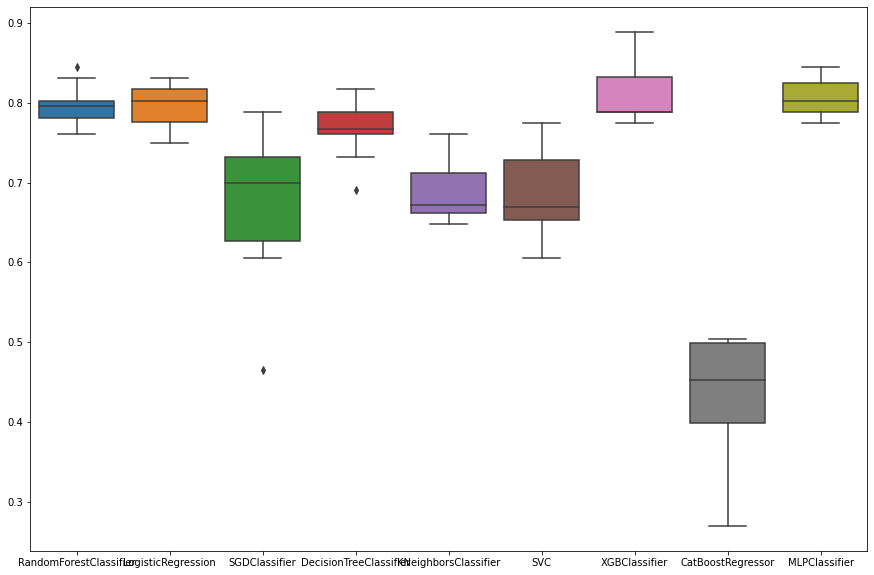

In [61]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize = (15,10))
sns.boxplot(data = scores)

## Random Forest

In [62]:
rfc = RandomForestClassifier()
rfc.fit(x_train_split,y_train_split)

RandomForestClassifier()

In [85]:
from sklearn.metrics import accuracy_score,make_scorer

y_pred_rfc = rfc.predict(x_test_split)
print("Acurácia: ", accuracy_score(y_test_split,y_pred_rfc))

score = cross_val_score(rfc,x_train_split,y_train_split,cv=10)
print(f"Cross Val Score: {score.mean():.2f} (+/- {score.std() * 2:.2f})",  )


Acurácia:  0.8156424581005587
Cross Val Score: 0.80 (+/- 0.05)


### Hiperparameter tunning

In [64]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [65]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(rfc,random_grid)
randomSearch = rf_random.fit(x_train_split,y_train_split)
randomSearch

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

In [66]:
print("Best score: ",randomSearch.best_score_)
print("Best params",randomSearch.best_params_)

Best score:  0.8146065202403232
Best params {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 110, 'bootstrap': False}


In [67]:
rfcTunned = RandomForestClassifier(**randomSearch.best_params_)
rfcTunned.fit(x_train_split,y_train_split)

RandomForestClassifier(bootstrap=False, max_depth=110, max_features='sqrt',
                       min_samples_split=10, n_estimators=800)

In [84]:
y_pred_rfc = rfcTunned.predict(x_test_split)

print("Acurácia: ", accuracy_score(y_test_split,y_pred_rfc))

score = cross_val_score(rfcTunned,x_train_split,y_train_split,cv=10)
print(f"Cross Val Score: {score.mean():.2f} (+/- {score.std() * 2:.2f})",  )

Acurácia:  0.8268156424581006
Cross Val Score: 0.82 (+/- 0.04)


## MLPClassifier

In [69]:
mlp = MLPClassifier(max_iter=100)
mlp.fit(x_train_split,y_train_split)

MLPClassifier(max_iter=100)

In [82]:

y_pred_rfc = mlp.predict(x_test_split)


print("Acurácia: ", accuracy_score(y_test_split,y_pred_rfc))
score = cross_val_score(mlp,x_train_split,y_train_split,cv=10)
print(f"Cross Val Score: {score.mean():.2f} (+/- {score.std() * 2:.2f})",  )

Acurácia:  0.8100558659217877
Cross Val Score: 0.81 (+/- 0.06)


### Hyperparameter tunning

In [71]:
MLPGrid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu','logistic','identity'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.05,0.1,0.5],
    'learning_rate': ['constant','adaptive'],
}

rf_random = RandomizedSearchCV(mlp,MLPGrid)
randomSearch = rf_random.fit(x_train_split,y_train_split)
randomSearch

RandomizedSearchCV(estimator=MLPClassifier(max_iter=100),
                   param_distributions={'activation': ['tanh', 'relu',
                                                       'logistic', 'identity'],
                                        'alpha': [0.0001, 0.05, 0.1, 0.5],
                                        'hidden_layer_sizes': [(50, 50, 50),
                                                               (50, 100, 50),
                                                               (100,)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'solver': ['sgd', 'adam', 'lbfgs']})

In [72]:
print("Best score: ",randomSearch.best_score_)
print("Best params",randomSearch.best_params_)

Best score:  0.7935487048163103
Best params {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.5, 'activation': 'relu'}


In [83]:
mlpTunned = MLPClassifier(max_iter=100,**randomSearch.best_params_)
mlpTunned.fit(x_train_split,y_train_split)
y_pred_rfc = mlpTunned.predict(x_test_split)

print("Acurácia: ", accuracy_score(y_test_split,y_pred_rfc))

score = cross_val_score(mlpTunned,x_train_split,y_train_split,cv=10)
print(f"Cross Val Score: {score.mean():.2f} (+/- {score.std() * 2:.2f})",  )


Acurácia:  0.8044692737430168
Cross Val Score: 0.78 (+/- 0.07)


## Predict nos dados

In [74]:
testDF = pd.read_csv("test.csv")
testDF

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [75]:
testDF['Sex'] = testDF['Sex'].apply(lambda x:convertSex(x))
testDF['Age'] = testDF.Age.fillna(0)
testDF['Fare'] = testDF.Fare.fillna(0)

testDF['Cabin'] = testDF.Cabin.fillna('N')
testDF['Cabin'] = testDF.Cabin.apply(lambda x:cabinCat(x))
engAtb = testDF.drop(["Ticket",'PassengerId',"Name"],axis=1)
engAtb =  pd.get_dummies(engAtb,columns=['Pclass','Embarked'])
engAtb

,Sex,Age,SibSp,Parch,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,34.5,0,0,7.8292,0,0,0,1,0,1,0
1,0,47.0,1,0,7.0000,0,0,0,1,0,0,1
2,1,62.0,0,0,9.6875,0,0,1,0,0,1,0
3,1,27.0,0,0,8.6625,0,0,0,1,0,0,1
4,0,22.0,1,1,12.2875,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1,0.0,0,0,8.0500,0,0,0,1,0,0,1
414,0,39.0,0,0,108.9000,1,1,0,0,1,0,0
415,1,38.5,0,0,7.2500,0,0,0,1,0,0,1
416,1,0.0,0,0,8.0500,0,0,0,1,0,0,1


In [76]:
#predict = rfcTunned.predict(engAtb)
predict = mlpTunned.predict(engAtb)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [77]:
gd_sub = pd.read_csv('gender_submission.csv')
gd_sub['Survived'] = predict
gd_sub.to_csv('./submission.csv',index=False)
gd_sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## Resultados do Random Forest

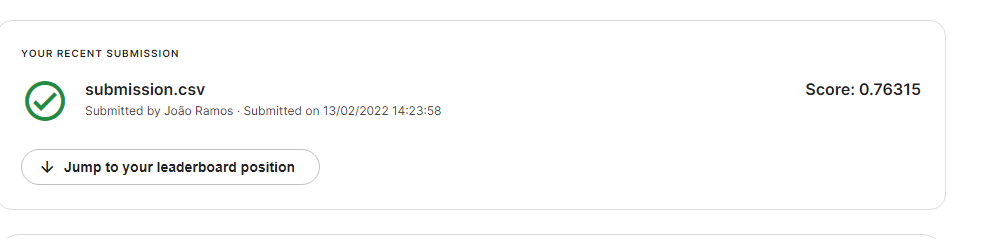

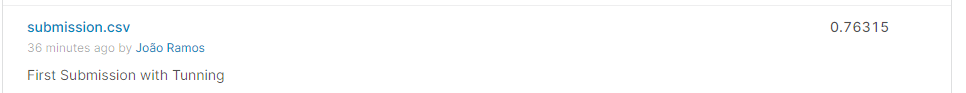

## Resultados com o MLC

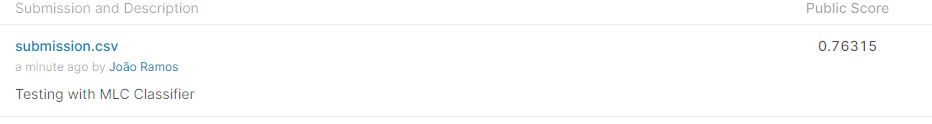

## Resultado com o MLC Tunned

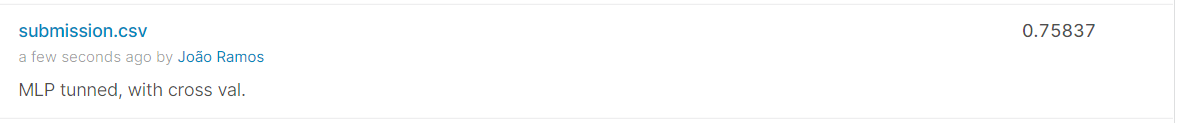

## Tentativa com o Auto-ML

In [78]:
from autosklearn.classification import AutoSklearnClassifier


In [87]:
autoSklearn = AutoSklearnClassifier()
autoSklearn.fit(x_train_split, y_train_split)


AutoSklearnClassifier(per_run_time_limit=360)

In [89]:
predictions = autoSklearn.predict(x_train_split)

In [91]:
print("Acurácia: ", accuracy_score(y_test_split,y_pred_rfc))

score = cross_val_score(autoSklearn,x_train_split,y_train_split,cv=3)
print(f"Cross Val Score: {score.mean():.2f} (+/- {score.std() * 2:.2f})",  )

Acurácia:  0.8156424581005587
Cross Val Score: 0.80 (+/- 0.04)


In [93]:
predict = autoSklearn.predict(engAtb)
gd_sub = pd.read_csv('gender_submission.csv')
gd_sub['Survived'] = predict
gd_sub.to_csv('./submission.csv',index=False)
gd_sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
